In [67]:
from runner import io
import pandas as pd

In [ ]:
aux_df = io.load_table("raw", "land_use_transitions_new")

In [28]:
list_municipios_pantanal = [
        "Baro de Melgao (MT)",
        "Cceres (MT)",
        "Itiquira (MT)",
        "Lambari D'Oeste (MT)",
        "Nossa Senhora do Livramento (MT)",
        "Pocon (MT)",
        "Santo Antnio do Leverger (MT)",
        "Aquidauana (MS)",
        "Bodoquena (MS)",
        "Corumb (MS)",
        "Coxim (MS)",
        "Ladrio (MS)",
        "Miranda (MS)",
        "Sonora (MS)",
        "Porto Murtinho (MS)",
        "Rio Verde de Mato Grosso (MS)",
    ]

In [29]:
aux_df["location"] = aux_df["municipality"] + " (" + aux_df["UF"] + ")"

In [31]:
assert len(set(list_municipios_pantanal) - set(aux_df.query("location.isin(@list_municipios_pantanal)").location.unique())) == 0

In [32]:
pantanal_df = aux_df.query("location.isin(@list_municipios_pantanal)")

In [79]:
natural_ids = [3, 4 ,5 ,49 ,11 ,12 ,32 ,29 ,50 ,13]
dict_rename_transition = {
        str(i) + "-" + str(i + 1): pd.to_datetime(str(i)) for i in range(1985, 2021)
    }

In [80]:
grouped_df = (
    pantanal_df
    .query("level_0 == 'Anthropic'")
    .rename(columns=dict_rename_transition)
    .groupby(
        ["municipality", "UF", "level_2"], as_index=False, dropna=False
    )
    .sum()
)

<AxesSubplot:>

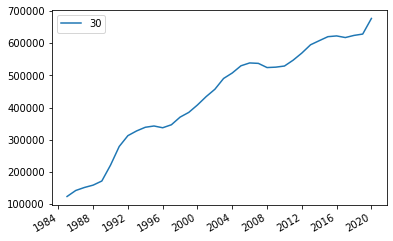

In [88]:
grouped_df.query("municipality == 'Corumb' and level_2 == 'Pasture'")[dict_rename_transition.values()].T.plot()

In [89]:
io.load_table("preprocessed", "land_use_transitions")

,city,state,location,from_level_0,from_level_1,from_level_2,from_level_3,from_level_4,to_level_0,to_level_1,...,2010-2011,2011-2012,2012-2013,2013-2014,2014-2015,2015-2016,2016-2017,2017-2018,2018-2019,2019-2020
0,Alta Floresta D'Oeste,RO,Alta Floresta D'Oeste (RO),Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,Natural,1. Forest,...,369750.058053,367863.434256,366543.101348,372449.464902,370658.870547,368261.068320,366574.154739,363444.916821,358736.267416,353883.625488
1,Alta Floresta D'Oeste,RO,Alta Floresta D'Oeste (RO),Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,Natural,1. Forest,...,15.455916,25.321347,47.150596,0.961214,18.325705,7.157178,14.226012,15.275302,20.437262,15.888434
2,Alta Floresta D'Oeste,RO,Alta Floresta D'Oeste (RO),Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,Natural,2. Non Forest Natural Formation,...,2.182460,2.965243,3.227672,1.136728,2.532470,2.796031,1.135623,1.398583,2.880648,2.877691
3,Alta Floresta D'Oeste,RO,Alta Floresta D'Oeste (RO),Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,Natural,2. Non Forest Natural Formation,...,87.291043,129.969139,240.469937,41.083866,140.552128,145.392997,63.560156,54.994236,152.388184,119.579231
4,Alta Floresta D'Oeste,RO,Alta Floresta D'Oeste (RO),Natural,1. Forest,Forest Formation,Forest Formation,Forest Formation,Anthropic,3. Farming,...,2904.755037,2654.262112,7211.716707,2560.691716,2589.238797,3187.564073,2008.301873,1678.974453,3670.382850,5103.198491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540850,Brasília,DF,Brasília (DF),Natural,5. Water,"River, Lake and Ocean","River, Lake and Ocean","River, Lake and Ocean",Anthropic,3. Farming,...,3.356635,4.905899,5.422871,8.094028,4.993892,5.508418,5.077730,9.037555,10.930134,6.370969
540851,Brasília,DF,Brasília (DF),Natural,5. Water,"River, Lake and Ocean","River, Lake and Ocean","River, Lake and Ocean",Anthropic,4. Non Vegetated Area,...,1.463535,1.549695,2.755122,1.550012,1.119369,0.688783,0.688894,1.721869,0.516668,1.119533
540852,Brasília,DF,Brasília (DF),Natural,5. Water,"River, Lake and Ocean","River, Lake and Ocean","River, Lake and Ocean",Anthropic,4. Non Vegetated Area,...,NaN,0.431005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
540853,Brasília,DF,Brasília (DF),Natural,5. Water,"River, Lake and Ocean","River, Lake and Ocean","River, Lake and Ocean",Anthropic,4. Non Vegetated Area,...,1.980291,8.093762,3.616434,3.185299,3.530771,3.445479,1.893862,3.875133,2.754090,4.477994
